In [207]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


## Data

In [249]:
data = pd.read_csv("USA_Housing.csv")

In [250]:
data.drop('Address',axis= 1, inplace =True)

In [251]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## Preprocessing

In [252]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']


###  Standardization

$$ y = {(x - mean) \over standard\; deviation} $$

In [253]:
df = pd.DataFrame()

for i in range(0,5):
    col = X.columns[i]
    mean = X[col].mean()
    std =X[col].std()
     
    def standard(x):
        return (x-mean)/std
    
    df[col] = X[col].apply(standard)


##  Model

### Hypothesis

Since we have 5 features:
$$h_θ (x)=\theta_0+\theta_1 x_1+\theta_2 x_2 + \theta_3 x_3 +\theta_4 x_4 + \theta_5 x_5$$

We can start with $0$ as the initial value of $\theta$

In [254]:
x = np.array(df)
y = np.array(y)

In [255]:
x = np.hstack((np.ones((x.shape[0],1)), x))
y = np.reshape(y, (5000,1))

In [256]:
theta = np.zeros((x.shape[1], 1))

In [257]:
def hypo(x, theta):
    return np.matmul(x, theta)

### Loss

- Loss function
$$J(θ) = {1 \over 2} \sum\limits_{i=1}^{n}(h_θ(x)^{(i)} - y^{(i)})^2 $$

- cost function
$${1 \over 2n} \sum\limits_{i=1}^{n}(h_θ(x)^{(i)} - y^{(i)})^2 $$
where n is the number of sampled data


In [258]:
def cost_fn(x,y, theta):
    return (hypo(x, theta) - y).T@(hypo(x, theta) - y)/(2*x.shape[0])


### Gradient Descent

$$\theta_j := \theta_j - \alpha {\partial \over \partial\theta_j}J(\theta)$$

$$\theta := \theta - \alpha \sum\limits_{i=1}^{n}(y^{(i)} - h_\theta(x^{(i)})).x^{(i)}$$


In [259]:
def grad_d(x,y,theta,alpha=0.1 ,epochs=10):
    m = x.shape[0]
    cost = []
    
    for i in range(epochs):
        h_x   = hypo(x , theta)
        error = (1/m)*(x.T@(h_x - y))
        theta = theta - (alpha)*error
        cost.append(cost_fn(x,y,theta))
    
    return theta , cost
        

In [260]:
theta, cost = grad_d(x, y, theta , alpha= 0.1 , epochs = 30)

##  Evaluation

In [343]:
def pl_cost(J, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, J)

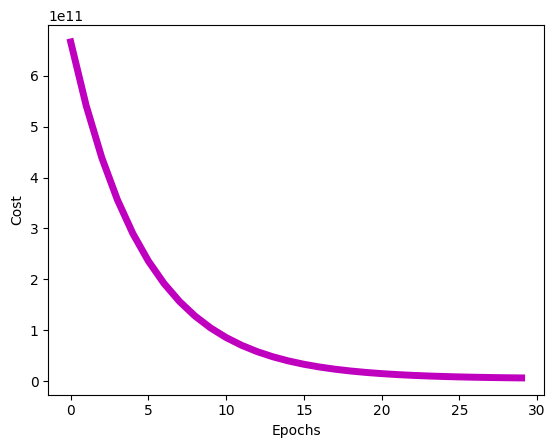

In [345]:
#for testing and plotting cost 
epochs = []
z = []
count = 0
for i in cost:
    z.append(i[0][0])
    epochs.append(count)
    count += 1
z = np.array(z)
epochs = np.array(epochs)
plot_cost(z, epochs)



###  Test

In [333]:
sample= data.sample()
sample

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1207,84020.497594,5.377846,7.328435,4.24,25975.505829,1.458009e+06


In [334]:
sample.drop('Price',axis=1,inplace=True)

In [335]:
for i in range(0,5):
    col = X.columns[i]
    mean = X[col].mean()
    std =X[col].std()
    
    sample_col = sample.columns[i]
     
    def standard(x):
        return (x-mean)/std
    
    sample[sample_col] = sample[sample_col].apply(standard)
        
   

In [336]:
sample = np.array(sample)
sample[0][0] = 1

In [337]:
result = theta[0] + theta[1]*sample[0][1] + theta[2]*sample[0][2] + theta[3]*sample[0][3]+ theta[4]*sample[0][4]
print("Price of house: ", result[0])

Price of house:  1108841.6715345266


## The Normal Equation

- Therefore the value of $\theta$ that minimizes $J(\theta)$ is given in closed form by the equaton below:
$$\theta = (X^TX)^{-1}X^T\vec{y}$$

In [338]:
theta_normal = (np.linalg.inv(x.T@x))@(x.T)@(y)

In [339]:
theta_normal

array([[1232072.65414236],
       [ 229978.66143211],
       [ 164221.85396889],
       [ 121363.78620366],
       [   2037.73223706],
       [ 150877.26565199]])

In [347]:
result_normal = theta_normal[0] + theta_normal[1]*sample[0][1] + theta_normal[2]*sample[0][2] + theta_normal[3]*sample[0][3]+ theta_normal[4]*sample[0][4]
print("Price of house: ", result_normal[0])

Price of house:  1172003.3695330382
